In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# Parameters
T = 21.8       # Pendulum natural period (seconds)
T1 = 24.5      # Galvanometer natural period (seconds)
l = 123.8      # Pendulum length (cm)
mu = 0.2       # Damping coefficient
A1 = 1040      # Static magnification
k = 38         # Coupling coefficient

# Create period array (log scale)
Tp = np.logspace(-1, 2, num=200)  # 0.1 to 100 seconds

# Calculate amplitude response using your formula
ym = 1.0
u = Tp / float(T)
u1 = Tp / T1
fu = (2.*u/(1.+u**2))**2
C1 = np.pi * l / (k*A1)
xm = C1 * ym/Tp * (1.+u**2) * (1.+u1**2) * np.sqrt(1.-fu*mu**2)
amplitude = 1./xm

# Calculate frequency and angular frequency for phase calculation
f = 1 / Tp
omega = 2 * np.pi * f

In [3]:
# Now let's calculate the phase response
# For Galitzin seismograph, phase shift depends on period ratios
# This is a simplified approximation based on theoretical considerations
def calculate_phase(u, u1, mu):
    """Calculate phase response based on period ratios"""
    # Base phase contribution from pendulum (90° at resonance, approaching 180° at high frequencies)
    pendulum_phase = np.arctan2(2*mu*u, 1-u**2)
    
    # Galvanometer contribution (similar behavior)
    galvanometer_phase = np.arctan2(2*0.5*u1, 1-u1**2)  # Assuming damping of 0.5 for galvanometer
    
    # Additional 90° for electromagnetic coupling
    coupling_phase = np.pi/2
    
    # Total phase is the sum, converted to degrees
    total_phase = (pendulum_phase + galvanometer_phase + coupling_phase) * 180/np.pi
    
    # Adjust phase to be within -180 to 180 range
    total_phase = np.mod(total_phase + 180, 360) - 180
    
    return total_phase

phase = calculate_phase(u, u1, mu)

(0.0, 100.0)

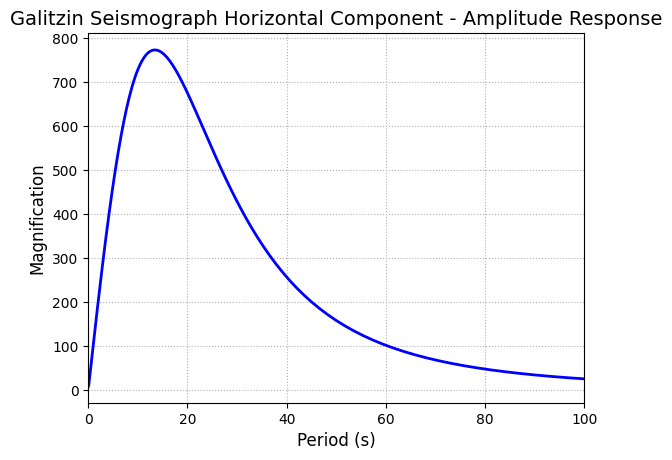

In [4]:
plt.plot(Tp, amplitude, 'b-', linewidth=2)
plt.title('Galitzin Seismograph Horizontal Component - Amplitude Response', fontsize=14)
plt.xlabel('Period (s)', fontsize=12)
plt.ylabel('Magnification', fontsize=12)
plt.grid(True, which="both", ls=":")
plt.xlim(0, 100)
#plt.ylim(0, 0.0015)

C:\Users\Colin\AppData\Local\Temp\ipykernel_4828\4155949599.py:10: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax1.set_xlim(0, 100)


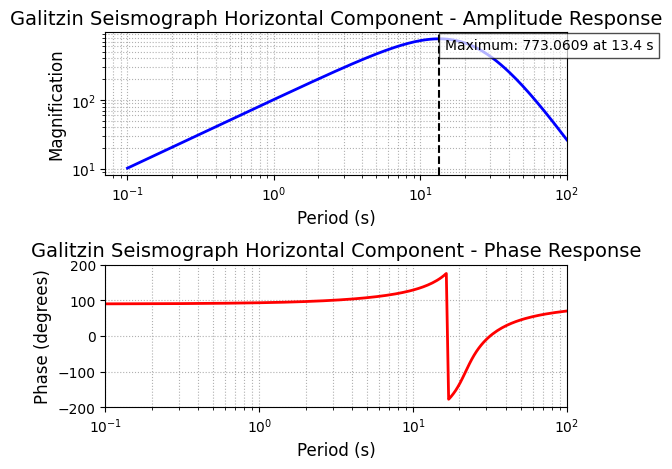

In [5]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1)

# Plot amplitude response
ax1.loglog(Tp, amplitude, 'b-', linewidth=2)
ax1.set_title('Galitzin Seismograph Horizontal Component - Amplitude Response', fontsize=14)
ax1.set_xlabel('Period (s)', fontsize=12)
ax1.set_ylabel('Magnification', fontsize=12)
ax1.grid(True, which="both", ls=":")
ax1.set_xlim(0, 100)
#ax1.set_ylim(0, 0.0015)

# Find and mark the maximum amplitude
max_idx = np.argmax(amplitude)
max_amplitude = amplitude[max_idx]
max_period = Tp[max_idx]
ax1.axvline(x=max_period, color='k', linestyle='--')
ax1.text(max_period*1.1, max_amplitude*0.7, 
         f'Maximum: {max_amplitude:.4f} at {max_period:.1f} s', 
         fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Plot phase response
ax2.semilogx(Tp, phase, 'r-', linewidth=2)
ax2.set_title('Galitzin Seismograph Horizontal Component - Phase Response', fontsize=14)
ax2.set_xlabel('Period (s)', fontsize=12)
ax2.set_ylabel('Phase (degrees)', fontsize=12)
ax2.grid(True, which="both", ls=":")
ax2.set_xlim(0.1, 100)
ax2.set_ylim(-200, 200)

plt.tight_layout()
plt.show()